Declare Ticker

In [1]:
ticker = "AMC"

Import the Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import MinMaxScaler



%matplotlib inline

Load the Training Dataset

In [3]:
file = "C:\\Users\\WhyglePa\\source\\repos\\algo-trading\\src\\Python\\TDAmeritrade\\Notebook\\ML\\Data\\" + ticker + ".csv"
print(file)
dataset_train = pd.read_csv(file).tail(1000).head(500)
dataset_train.head

C:\Users\WhyglePa\source\repos\algo-trading\src\Python\TDAmeritrade\Notebook\ML\Data\AMC.csv


<bound method NDFrame.head of             Date   Open   High    Low  Close  Adj Close     Volume
1237  2018-11-15  15.50  15.51  14.74  14.74  13.438042    2166000
1238  2018-11-16  14.65  14.75  13.99  14.05  12.808989    2505200
1239  2018-11-19  14.05  14.30  13.20  13.49  12.298451    2973500
1240  2018-11-20  13.22  13.71  13.04  13.29  12.116117    3077300
1241  2018-11-21  13.42  14.25  13.38  13.94  12.708704    1631900
...          ...    ...    ...    ...    ...        ...        ...
1732  2020-11-04   2.40   2.43   2.24   2.31   2.310000    7609100
1733  2020-11-05   2.35   2.57   2.27   2.46   2.460000    8056200
1734  2020-11-06   2.43   2.62   2.33   2.49   2.490000    9049500
1735  2020-11-09   4.27   4.39   3.23   3.77   3.770000  132511000
1736  2020-11-10   3.99   4.03   3.34   3.51   3.510000   42129300

[500 rows x 7 columns]>

Use the Open Stock Price Column to Train Your Model

In [4]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[15.5     ]
 [14.65    ]
 [14.05    ]
 [13.22    ]
 [13.42    ]
 [13.85    ]
 [14.      ]
 [14.13    ]
 [13.45    ]
 [13.75    ]
 [14.02    ]
 [13.85    ]
 [14.15    ]
 [14.1     ]
 [14.45    ]
 [14.24    ]
 [14.49    ]
 [15.26    ]
 [15.33    ]
 [14.71    ]
 [14.47    ]
 [14.19    ]
 [13.96    ]
 [13.38    ]
 [13.07    ]
 [12.28    ]
 [12.35    ]
 [12.43    ]
 [12.25    ]
 [12.5     ]
 [12.01    ]
 [12.8     ]
 [13.22    ]
 [13.55    ]
 [14.21    ]
 [14.74    ]
 [13.8     ]
 [13.76    ]
 [13.98    ]
 [14.18    ]
 [14.29    ]
 [14.09    ]
 [14.16    ]
 [14.01    ]
 [13.59    ]
 [13.81    ]
 [14.39    ]
 [13.97    ]
 [14.06    ]
 [14.35    ]
 [14.18    ]
 [14.52    ]
 [14.17    ]
 [14.35    ]
 [13.99    ]
 [13.67    ]
 [13.28    ]
 [13.74    ]
 [13.2     ]
 [13.3     ]
 [13.44    ]
 [13.73    ]
 [13.72    ]
 [13.32    ]
 [13.65    ]
 [13.84    ]
 [14.02    ]
 [13.64    ]
 [13.55    ]
 [13.92    ]
 [15.66    ]
 [16.110001]
 [15.65    ]
 [15.63    ]
 [15.13    ]
 [14.5     ]
 [14.77    ]

Normalizing the Dataset

In [5]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.92515593],
       [0.86625087],
       [0.82467082],
       [0.76715177],
       [0.78101178],
       [0.81081081],
       [0.82120582],
       [0.83021483],
       [0.78309078],
       [0.8038808 ],
       [0.82259182],
       [0.81081081],
       [0.83160083],
       [0.82813583],
       [0.85239085],
       [0.83783784],
       [0.85516286],
       [0.90852391],
       [0.91337491],
       [0.87040887],
       [0.85377685],
       [0.83437283],
       [0.81843382],
       [0.77823978],
       [0.75675676],
       [0.7020097 ],
       [0.70686071],
       [0.71240471],
       [0.6999307 ],
       [0.71725572],
       [0.68329868],
       [0.73804574],
       [0.76715177],
       [0.79002079],
       [0.83575884],
       [0.87248787],
       [0.80734581],
       [0.8045738 ],
       [0.81981982],
       [0.83367983],
       [0.84130284],
       [0.82744283],
       [0.83229383],
       [0.82189882],
       [0.79279279],
       [0.80803881],
       [0.84823285],
       [0.819

Creating X_train and y_train Data Structure

In [6]:
X_train = []
Y_train = []
rg = scaled_training_set.shape[0] -1

for i in range(60, rg):
    X_train.append(scaled_training_set[i-60:i, 0])
    Y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(X_train.shape)
print(Y_train.shape)

(439, 60)
(439,)


Reshape the Data

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(439, 60, 1)

Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
              
regressor.add(Dense(units=1))


Fitting the Model

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 [==============================] - 19s 49ms/step - loss: 0.0720
Epoch 2/100
14/14 [==============================] - 3s 216ms/step - loss: 0.0161
Epoch 3/100
14/14 [==============================] - 1s 47ms/step - loss: 0.0094
Epoch 4/100
14/14 [==============================] - 3s 222ms/step - loss: 0.0087
Epoch 5/100
14/14 [==============================] - 1s 49ms/step - loss: 0.0083
Epoch 6/100
14/14 [==============================] - 3s 211ms/step - loss: 0.0104
Epoch 7/100
14/14 [==============================] - 1s 38ms/step - loss: 0.0080
Epoch 8/100
14/14 [==============================] - 3s 218ms/step - loss: 0.0077
Epoch 9/100
14/14 [==============================] - 1s 37ms/step - loss: 0.0075
Epoch 10/100
14/14 [==============================] - 3s 210ms/step - loss: 0.0067
Epoch 11/100
14/14 [==============================] - 1s 45ms/step - loss: 0.0070
Epoch 12/100
14/14 [==============================] - 0s 30ms/step - loss: 0.0079
Epoch 13/100
14/14 

Extracting the Actual Stock Prices

In [10]:
dataset_test = pd.read_csv("C:\\Users\\WhyglePa\\source\\repos\\algo-trading\\src\\Python\\TDAmeritrade\\Notebook\\ML\\Data\\" + ticker + ".csv").tail(1000)
actual_stock_price = dataset_test.iloc[:,1:2].values

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

C:\Users\WhyglePa\AppData\Local\Temp\ipykernel_29252\3403768990.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values


Predicting the Values

In [12]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

32/32 [==============================] - 3s 20ms/step


Plotting the Actual and Predicted Prices

2018-11-15
2022-11-04


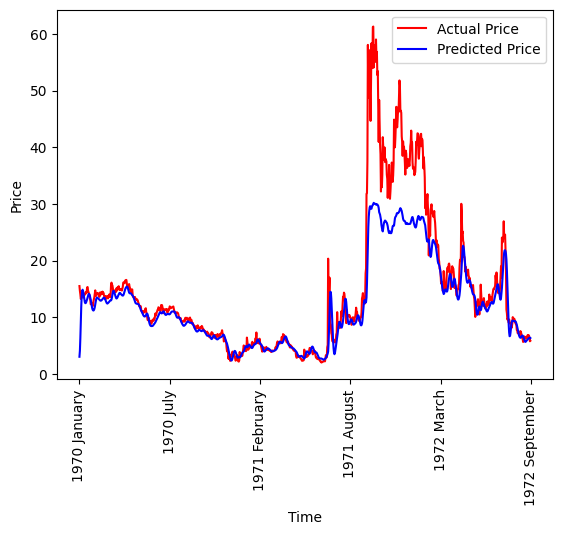

In [15]:
fig,ax1 = plt.subplots()
first_dt = dataset_train.head(1).iloc[0,0]
print(first_dt)

last_dt = dataset_test.tail(1).iloc[0,0]
print(last_dt)

# NEED TO GET DATES ON DATA
# ax1.set_xlim(np.datetime64(first_dt), np.datetime64(last_dt))

plt.plot(actual_stock_price, color = 'red', label = 'Actual Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
monthyearFmt = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)